In [1]:
import importlib, sys
import pickle
import numpy as np
import warnings
from sklearn.metrics import mean_squared_error
import pandas as pd
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
parentdir = 'C:\\Users\\danie\\Documents\\work\\testingRS\\TESTS'
sys.path.insert(0,parentdir) 
import entity
importlib.reload(entity)
from entity import User, CB, MF, CF, HYBRID
import utils.dataset_metrics as dt

In [4]:
with open('C:\\Users\\danie\\Documents\\work\\testingRS\\TESTS\\objects\\tfidf.pkl', 'rb') as f:
    tfidf_matrix, tfidf_feature_names, full_item_ids = pickle.load(f)

with open('C:\\Users\\danie\\Documents\\work\\testingRS\\TESTS\\objects\\subset_1000.pkl', 'rb') as f:
    utility_matrix_1, interactions_work_1 = pickle.load(f)
    
with open('C:\\Users\\danie\\Documents\\work\\testingRS\\TESTS\\objects\\subset_40000.pkl', 'rb') as f:
    utility_matrix_2, interactions_work_2 = pickle.load(f)
    
with open('C:\\Users\\danie\\Documents\\work\\testingRS\\TESTS\\objects\\subset_72269.pkl', 'rb') as f:
    utility_matrix_3, interactions_work_3 = pickle.load(f)

In [6]:
users1 = interactions_work_1.personId.unique()
users2 = interactions_work_2.personId.unique()
users3 = interactions_work_3.personId.unique()

### SUBSET 1

In [7]:
um = utility_matrix_1
users = users1
print(dt.get_overall_sparsity(um))
print(len(users))
print(um.shape)

0.9777
234
(234, 129)


In [324]:
um.shape[1] - (um == 0).astype(int).sum(axis=1)

personId
-1032019229384696495    36
-108842214936804958     14
-123314413156450014      1
-1352542225971050638     2
-1387464358334758758     2
                        ..
9038446466275805109      1
9050204922960952289      2
9135582630122950040      3
9137372837662939523      1
9210530975708218054      1
Length: 234, dtype: int64

In [247]:
USER1 = '-1032019229384696495' ## maximas interacciones
USER2 = '-108842214936804958'
USER3 = '9135582630122950040'
USER4 = '9210530975708218054'   ##solo 1 interaccion

1.0


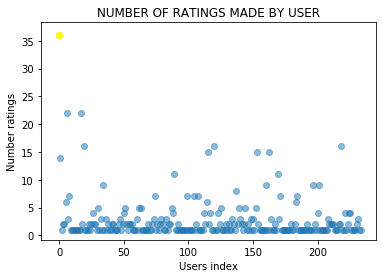

DEVIATION = 4.0 
MEDIAN = 1.0 
MEAN = 2


In [9]:
M1 = dt.get_metric1(USER1, um)
print(M1)
dt.plot_user_activity_m1(utility_matrix_1, USER1)

0.101


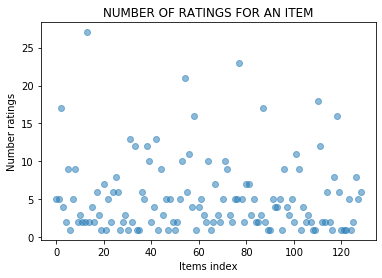

DEVIATION = 4.795831523312719 
MEDIAN = 4 
MEAN = 5


In [41]:
M3 = dt.get_metric3(um)
print(M3) 
dt.plot_items_activity_m3(um)

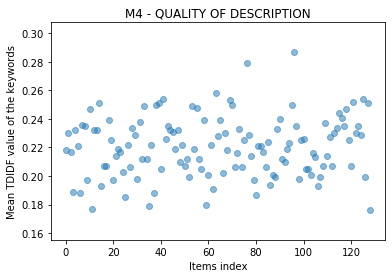

DEVIATION = 0.02075571976831387 
MEDIAN = 0.221 
MEAN = 0.22071317829457365


In [48]:
mean_q = dt.plot_quality_descriptors_m4(um,  tfidf_matrix, tfidf_feature_names, full_item_ids)
M4 = round(mean_q,3)
print(M4)

## Análisis CF

In [99]:
NUMBER_NEIGHBORS = 10
user_object = User(USER4, utility_matrix_1, interactions_work_1)
cf = CF(user_object, NUMBER_NEIGHBORS)
neigs, similarities, ind = cf.getNneighbors()
p, its = cf.default_rating()

In [100]:
print(round(p, 3))
print(len(its)) 
print(np.mean(similarities))
similarities

-0.208
35
0.24873885995527356


[0.35355339059327373, 0.25, 0.2357022603955159, 0.15569978883230462]

## PRUEBAS SUBSET 1 

In [274]:
USER1 = '-1032019229384696495' ## maximas interacciones
USER2 = '-108842214936804958'
USER3 = '9135582630122950040'
USER4 = '9210530975708218054'   ##solo 1 interaccion
FACTORS_MF = 15
NUMBER_NEIGHBORS = 10
test0 = [0.33, 0.33, 0.33] 
test1 = [0.7, 0.15, 0.15] 
test2 = [0.15, 0.7, 0.15] 
test3 = [0.15, 0.15, 0.7] 
test4 = [0, 0.5, 0.5] 
test5 = [0.5, 0.5, 0] 
weightsm = [test0, test1, test2, test3, test4, test5]

In [282]:
user_object = User(USER1, utility_matrix_1, interactions_work_1)
hy = HYBRID(user_object,FACTORS_MF, NUMBER_NEIGHBORS, full_item_ids, tfidf_matrix)
TOP = 10
df_Results = hy.compare_ratings(weightsm, TOP, 'all')
df_Results

0 of 36 items
1 of 36 items
2 of 36 items
3 of 36 items
4 of 36 items
5 of 36 items
6 of 36 items
7 of 36 items
8 of 36 items
9 of 36 items
10 of 36 items
11 of 36 items
12 of 36 items
13 of 36 items
14 of 36 items
15 of 36 items
16 of 36 items
17 of 36 items
18 of 36 items
19 of 36 items
20 of 36 items
21 of 36 items
22 of 36 items
23 of 36 items
24 of 36 items
25 of 36 items
26 of 36 items
27 of 36 items
28 of 36 items
29 of 36 items
30 of 36 items
31 of 36 items
32 of 36 items
33 of 36 items
34 of 36 items
35 of 36 items


,ORIGINAL,CB,MF,CF,HY-0,HY-1,HY-2,HY-3,HY-4,HY-5
-1039912738963181810,0.4,0.0986818,0.111697,0.469852,0.224476,0.156310,0.163468,0.360453,0.290775,0.105189
-1590585250246572231,0.4,0.214997,0.117161,0.564039,0.295745,0.252678,0.198868,0.444651,0.340600,0.166079
-2081760549863309770,0.4,0.0598655,0.200958,0.521153,0.258052,0.150223,0.227824,0.403931,0.361056,0.130412
-2176468683077766369,0.4,0.267858,0.180309,0.521153,0.319876,0.292720,0.244568,0.432032,0.350731,0.224084
-3173020603774823976,0.6,0.118312,0.146617,0.689395,0.314927,0.208220,0.223788,0.522316,0.418006,0.132465
-3367778232969996503,0.6,0.275473,0.158744,0.464138,0.296457,0.286263,0.222062,0.390029,0.311441,0.217108
-4110991218639855802,0.4,0.162225,0.164105,0.559123,0.292199,0.222041,0.223075,0.440336,0.361614,0.163165
-4186591400427142356,0.8,0.0256973,0.192799,0.506294,0.239181,0.122852,0.214758,0.387180,0.349546,0.109248
-4374331682165863764,0.6,0.242913,0.186892,0.513732,0.311367,0.275133,0.244321,0.424083,0.350312,0.214902
-454649054276160610,0.4,0.189569,0.145015,0.469852,0.265464,0.224928,0.200424,0.379084,0.307434,0.167292


In [283]:
hits = hy.compare_hits(weightsm, TOP, 'all')
hits

0 of 36 items
1 of 36 items
2 of 36 items
3 of 36 items
4 of 36 items
5 of 36 items
6 of 36 items
7 of 36 items
8 of 36 items
9 of 36 items
10 of 36 items
11 of 36 items
12 of 36 items
13 of 36 items
14 of 36 items
15 of 36 items
16 of 36 items
17 of 36 items
18 of 36 items
19 of 36 items
20 of 36 items
21 of 36 items
22 of 36 items
23 of 36 items
24 of 36 items
25 of 36 items
26 of 36 items
27 of 36 items
28 of 36 items
29 of 36 items
30 of 36 items
31 of 36 items
32 of 36 items
33 of 36 items
34 of 36 items
35 of 36 items


,CB,MF,CF,HY-0,HY-1,HY-2,HY-3,HY-4,HY-5
hit_10,6,4,12,10,6,5,14,13,5


## Calculate error

In [281]:
errors = pd.DataFrame(index = [USER], columns = ['CB','MF','CF'])
errors.loc[USER, 'CB'] = mean_squared_error(df_Results['ORIGINAL'].values, df_Results['CB'].values)
errors.loc[USER, 'MF'] = mean_squared_error(df_Results['ORIGINAL'].values, df_Results['MF'].values)
errors.loc[USER, 'CF'] = mean_squared_error(df_Results['ORIGINAL'].values, df_Results['CF'].values)
errors.loc[USER, 'HY-0'] = mean_squared_error(df_Results['ORIGINAL'].values, df_Results['HY-0'].values)
errors.loc[USER, 'HY-1'] = mean_squared_error(df_Results['ORIGINAL'].values, df_Results['HY-1'].values)
errors.loc[USER, 'HY-2'] = mean_squared_error(df_Results['ORIGINAL'].values, df_Results['HY-2'].values)
errors.loc[USER, 'HY-3'] = mean_squared_error(df_Results['ORIGINAL'].values, df_Results['HY-3'].values)
errors.loc[USER, 'HY-4'] = mean_squared_error(df_Results['ORIGINAL'].values, df_Results['HY-4'].values)
errors.loc[USER, 'HY-5'] = mean_squared_error(df_Results['ORIGINAL'].values, df_Results['HY-5'].values)
errors

,CB,MF,CF,HY-0,HY-1,HY-2,HY-3,HY-4,HY-5
-1032019229384696495,0.149792,0.141081,0.0364137,0.082623,0.114363,0.111242,0.043297,0.060713,0.143787


## CHECK USER 4 

In [248]:
user_object = User(USER4, utility_matrix_1, interactions_work_1)
hy = HYBRID(user_object,FACTORS_MF, NUMBER_NEIGHBORS, full_item_ids, tfidf_matrix)


In [229]:
IT = '1805789466376069146'
new_utility = hy.user.utility_matrix.copy()
new_utility.loc[hy.user.id, IT] = 0.0
new_interactions = hy.user.interactions_df.drop(hy.user.interactions_df[(
    hy.user.interactions_df.personId == hy.user.id) & (hy.user.interactions_df.contentId == IT)].index)
new_user_object = User(hy.user.id, new_utility, new_interactions) ###usuario sin interacciones

In [251]:
mf = MF(new_user_object, 15)
mf_predictions = mf.predictions_user()
mf_predictions[IT]

# list(mf_predictions.sort_values(by=hy.user.id, axis=0, ascending=False).iloc[0:10, 0].index)



9210530975708218054    0.158556
Name: 1805789466376069146, dtype: float64

In [241]:
mean_squared_error([hy.user.utility_matrix.loc[USER4, IT]/5], mf_predictions[IT])
# cf = CF(new_user_object, 10)
# cf_predictions = cf.predict_ratings()
# cb = CB(new_user_object, full_item_ids, tfidf_matrix)
# cb_predictions = cb.compute_similarities()

0.05829504499647195

## SUBSET 2

In [7]:
um = utility_matrix_2
# users = users2
print(dt.get_overall_sparsity(um))
# print(len(users))
print(um.shape)
# sorted(um.shape[1] - (um == 0).astype(int).sum(axis=1), reverse=True)
um.shape[1] - (um == 0).astype(int).sum(axis=1)

0.9923
(1525, 1773)


personId
-1032019229384696495    504
-108842214936804958     230
-1110220372195277179      3
-1113322110177216831      1
-1130272294246983140     61
                       ... 
965837901014229373        2
983095443598229476        2
989049974880576288       13
98958074799194811         4
997469202936578234        5
Length: 1525, dtype: int64

In [35]:
# sorted(um.shape[1] - (um == 0).astype(int).sum(axis=1), reverse=True)
# um.shape[1] - (um == 0).astype(int).sum(axis=1)

USER1 = '-1032019229384696495' ## maximas interacciones
USER2 = '-108842214936804958'
USER3 = '-1130272294246983140'
USER4 = '965837901014229373' 

In [48]:
M1 = dt.get_metric1(USER4, um)
print(M1)

0.003


0.83


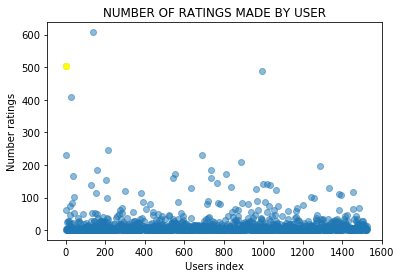

DEVIATION = 35.58089374931439 
MEDIAN = 4 
MEAN = 13


In [336]:
dt.plot_user_activity_m1(um, USER1)

0.006


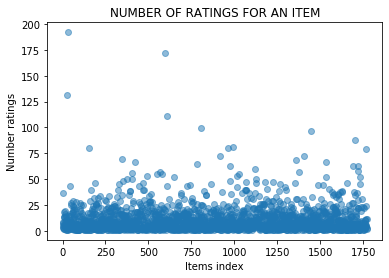

DEVIATION = 13.711309200802088 
MEDIAN = 8 
MEAN = 11


In [338]:
M3 = dt.get_metric3(um)
print(M3)   #### el 5% en este caso es 76
dt.plot_items_activity_m3(um)

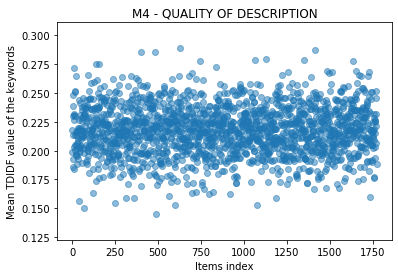

DEVIATION = 0.021345300024606065 
MEDIAN = 0.218 
MEAN = 0.21755499153976313
0.218


In [339]:
mean_q = dt.plot_quality_descriptors_m4(um,  tfidf_matrix, tfidf_feature_names, full_item_ids)
M4 = round(mean_q,3)
print(M4)

## PRUEBAS SUBSET 2

In [36]:
FACTORS_MF = 15
NUMBER_NEIGHBORS = 10
test0 = [0.33, 0.33, 0.33] 
test1 = [0.7, 0.15, 0.15] 
test2 = [0.15, 0.7, 0.15] 
test3 = [0.15, 0.15, 0.7] 
test4 = [0, 0.5, 0.5] 
test5 = [0.5, 0.5, 0] 
weightsm = [test0, test1, test2, test3, test4, test5]

In [37]:
user_object2 = User(USER4, utility_matrix_2, interactions_work_2)
hy2 = HYBRID(user_object2,FACTORS_MF, NUMBER_NEIGHBORS, full_item_ids, tfidf_matrix)
TOP = 10
df_Results2 = hy2.compare_ratings(weightsm, TOP, 'all')
df_Results2

0 of 2 items
1 of 2 items


,ORIGINAL,CB,MF,CF,HY-0,HY-1,HY-2,HY-3,HY-4,HY-5
-42126282997118624,0.4,0.0906245,0.322068,0.62286,0.341732,0.205176,0.332470,0.497906,0.472464,0.206346
751528815916485437,0.4,0.0906245,0.32206,0.458738,0.287569,0.180557,0.307846,0.383020,0.390399,0.206342


In [38]:
hits = hy2.compare_hits(weightsm, TOP, 10)
hits

0 of 2 items
1 of 2 items


,CB,MF,CF,HY-0,HY-1,HY-2,HY-3,HY-4,HY-5
hit_10,0,0,2,1,0,1,2,2,0


In [33]:
len(hy2.user.items_to_ignore)

61

In [39]:
USER = USER2
errors = pd.DataFrame(index = [USER], columns = ['CB','MF','CF'])
errors.loc[USER, 'CB'] = mean_squared_error(df_Results2['ORIGINAL'].values, df_Results2['CB'].values)
errors.loc[USER, 'MF'] = mean_squared_error(df_Results2['ORIGINAL'].values, df_Results2['MF'].values)
errors.loc[USER, 'CF'] = mean_squared_error(df_Results2['ORIGINAL'].values, df_Results2['CF'].values)
errors.loc[USER, 'HY-0'] = mean_squared_error(df_Results2['ORIGINAL'].values, df_Results2['HY-0'].values)
errors.loc[USER, 'HY-1'] = mean_squared_error(df_Results2['ORIGINAL'].values, df_Results2['HY-1'].values)
errors.loc[USER, 'HY-2'] = mean_squared_error(df_Results2['ORIGINAL'].values, df_Results2['HY-2'].values)
errors.loc[USER, 'HY-3'] = mean_squared_error(df_Results2['ORIGINAL'].values, df_Results2['HY-3'].values)
errors.loc[USER, 'HY-4'] = mean_squared_error(df_Results2['ORIGINAL'].values, df_Results2['HY-4'].values)
errors.loc[USER, 'HY-5'] = mean_squared_error(df_Results2['ORIGINAL'].values, df_Results2['HY-5'].values)
errors

,CB,MF,CF,HY-0,HY-1,HY-2,HY-3,HY-4,HY-5
-108842214936804958,0.0957132,0.00607406,0.0265584,0.008018,0.043056,0.006526,0.004937,0.002672,0.037503


In [ ]:
### MIRAR COMO SE COMPORTAN LOS VECINOS
us, sim, ind = cf.getNneighbors()
sum_n_similarities = np.sum(sim)
index_user = list(cf.user.utility_matrix.index).index(cf.user.id)
mean_rating_user = cf.user.utility_matrix.iloc[index_user, :].mean()
cf.user.utility_matrix.iloc[index_user, :]
wtd_sum = 0
for index, i in enumerate(ind):
    product = -np.mean(cf.user.utility_matrix.iloc[i, :]) * (sim[index])
    wtd_sum = wtd_sum + product
prediction = mean_rating_user + (wtd_sum/sum_n_similarities)

In [ ]:
## FALLA CUANDO NO SE TIENEN INTERACCIONES
user_object = User(USER, utility_matrix_1, interactions_work_1)
hy = HYBRID(user_object,FACTORS_MF, NUMBER_NEIGHBORS, full_item_ids, tfidf_matrix)
user_object.items_to_ignore  ## SOLO 1
for i, IT in enumerate(list(hy.user.items_to_ignore)):
    print(IT)
    new_utility = hy.user.utility_matrix.copy()
    new_utility.loc[hy.user.id, IT] = 0.0
    new_interactions = hy.user.interactions_df.drop(hy.user.interactions_df[(hy.user.interactions_df.personId == hy.user.id) & (hy.user.interactions_df.contentId == IT)].index)
    new_user_object = User(hy.user.id, new_utility, new_interactions)
    nhy = HYBRID(new_user_object, hy.factors_mf,hy.N_cf, hy.all_items, hy.tfidf_matrix)
#     ndf_all = nhy.get_all_predictions()

cb = CB(nhy.user,  nhy.all_items, nhy.tfidf_matrix,)

items_subset = list(cb.user.utility_matrix.columns)
items_to_compare = [x for x in items_subset if x not in cb.user.items_to_ignore]
subset_items_profiles = cb.get_items_profile(items_to_compare)
# profile_user = cb.build_user_profile()
interactions_person_df = cb.user.interactions_df.set_index('personId').loc[cb.user.id] ## FALLA SI NO HAY INTERACCIONES